In [14]:
#from __future__ import print_function
#enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
import math

sb.set_style("white")
#plt.style.use("tableau10") 

location = r'/Users/betty/desktop/final-project-bettycc/wheres-waldo-locations.csv'
wheres_waldo_locations = pd.read_csv(location)

#where_waldo_locations
wheres_waldo_locations.describe()

123
456


,Book,Page,X,Y
count,68.000000,68.000000,68.000000,68.000000
mean,3.514706,6.058824,6.700776,3.875306
std,1.856756,3.411492,3.703276,1.941349
min,1.000000,1.000000,0.625000,0.333333
25%,2.000000,3.000000,3.513889,2.250000
50%,3.000000,6.000000,6.694444,3.927083
75%,5.000000,9.000000,10.062500,5.291667
max,7.000000,12.000000,12.444444,7.708333


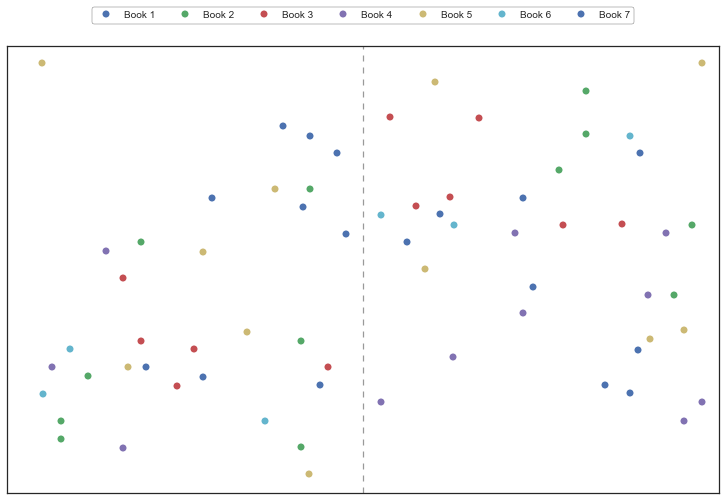

In [44]:
plt.figure(figsize = (12.75, 8))
plt.plot([6.375, 6.375], [0,8], "--", color="black", alpha=0.4, lw =1.25)

for book, group in wheres_waldo_locations.groupby("Book"):
    plt.plot(group.X, group.Y, "o", label="Book %d" % (book))
#use groupby to split the data
    
plt.xlim(0,12.75) #Get or set the x limits of the current axes.
                  #xlim( xmin, xmax )    # set the xlim to xmin, xmax
plt.ylim(0,8)
plt.xticks([])
plt.yticks([])
plt.legend( loc="upper center",ncol=7, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.1))

([], <a list of 0 Text yticklabel objects>)

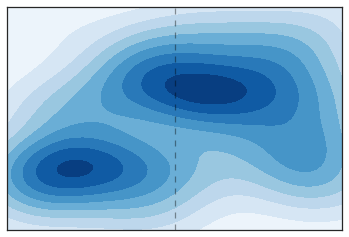

In [56]:
sb.kdeplot(wheres_waldo_locations.X, wheres_waldo_locations.Y, shade=True, cmap="Blues")
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)
plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])

In [58]:
waldo_location_map = {}

for i, record in wheres_waldo_locations.iterrows():
    key = "B%dP%d" % (record.Book, record.Page)
    waldo_location_map[key] = (record.X, record.Y)
    
waldo_location_map

{'B1P1': (5.5972222220000001, 1.9305555559999998),
 'B1P10': (5.9027777779999999, 6.0833333329999997),
 'B1P11': (5.4305555559999998, 6.4027777779999999),
 'B1P12': (9.4166666670000012, 3.6944444439999997),
 'B1P2': (7.7638888889999995, 5.0),
 'B1P3': (10.722222220000001, 1.9305555559999998),
 'B1P4': (3.513888889, 2.0833333330000001),
 'B1P5': (9.25, 5.2916666670000003),
 'B1P6': (5.3055555559999998, 5.125),
 'B1P7': (3.6666666669999999, 5.2916666670000003),
 'B1P8': (11.30555556, 2.5555555559999998),
 'B1P9': (11.16666667, 1.7916666669999999),
 'B2P1': (10.375, 7.1944444440000002),
 'B2P10': (5.2638888889999995, 0.81944444400000005),
 'B2P11': (2.388888889, 4.4861111110000005),
 'B2P12': (5.2638888889999995, 2.7291666669999999),
 'B2P2': (9.8888888890000004, 5.7777777779999999),
 'B2P3': (5.4305555559999998, 5.4444444440000002),
 'B2P4': (1.4444444440000002, 2.0972222220000001),
 'B2P5': (0.95833333300000001, 1.2777777779999999),
 'B2P6': (0.95833333300000001, 0.97222222200000008),
 

In [64]:
new_random_agent = waldo_location_map.keys()
#random.shuffle(new_random_agent)
new_random_agent

dict_keys(['B5P4', 'B2P9', 'B1P4', 'B4P7', 'B5P1', 'B3P5', 'B5P3', 'B4P2', 'B2P10', 'B3P3', 'B3P6', 'B4P6', 'B2P8', 'B3P9', 'B1P12', 'B1P7', 'B3P11', 'B1P11', 'B6P5', 'B2P2', 'B5P7', 'B4P5', 'B3P1', 'B4P9', 'B6P12', 'B7P1', 'B5P11', 'B1P2', 'B2P11', 'B1P6', 'B4P8', 'B7P6', 'B5P9', 'B2P1', 'B5P2', 'B5P8', 'B5P6', 'B3P7', 'B1P3', 'B2P7', 'B4P3', 'B7P3', 'B6P8', 'B1P5', 'B6P2', 'B6P1', 'B2P6', 'B6P11', 'B4P10', 'B3P2', 'B2P12', 'B5P5', 'B7P7', 'B2P5', 'B7P2', 'B4P4', 'B3P10', 'B2P3', 'B1P10', 'B1P9', 'B3P8', 'B5P10', 'B4P1', 'B1P8', 'B2P4', 'B1P1', 'B3P4', 'B4P11'])

In [34]:
#return a Euclidean distance between two points (x1, y1),(x2, y2)
def cal_distance(x1,y1,x2,y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

#build a fitness function(f())
#pass a solution, means pass an individual(x) from a population
#because an individual has the information of solution(f(x))
#it returns a solution, means it returns the result of f(x)
#in this case, the smaller is the better one
def compute_fitness(solution):
    solution_fitness = 0.0
    for index in range(1, len(solution)):
        w1 = solution[index]
        w2 = solution[index - 1]
        solution_fitness += cal_distance(waldo_location_map[w1][0], waldo_location_map[w1][1],
                                               waldo_location_map[w2][0], waldo_location_map[w2][1])
    return solution_fitness

#creates an initiation of population, means it creates a random waldo-seeking path
#it was used in the first principle for a GA algorithm
def generate_random_agent():
    new_random_agent = list(waldo_location_map.keys())
    random.shuffle(new_random_agent)
    return tuple(new_random_agent)

#creates a list of random Waldo-seeking paths 
#population size(pop_siz) = the number of a population
#it is the first principle foe a GA algorithm
#its the zero generation
def generate_random_population(pop_size):
    random_population = []
    for agent in range(pop_size):
        random_population.append(generate_random_agent())
    return random_population

#it mutates the individual in a mated population, means it introduce the chances to a new offspring
#to escape from the local optimization
#use a point mutation here, means swaps the order of two locations in the Waldo-seeking path
def mutate_agent(agent_genome, max_mutations=3):
    agent_genome = list(agent_genome)
    num_mutations = random.randint(1, max_mutations)
    
    for mutation in range(num_mutations):
        swap_index1 = random.randint(0, len(agent_genome) - 1)
        swap_index2 = swap_index1

        while swap_index1 == swap_index2:
            swap_index2 = random.randint(0, len(agent_genome) - 1)

        agent_genome[swap_index1], agent_genome[swap_index2] = agent_genome[swap_index2], agent_genome[swap_index1]
            
    return tuple(agent_genome)

#it mutates the individual in a mated population
#but only do a single shuffle mutation
def shuffle_mutation(agent_genome):
    agent_genome = list(agent_genome)
    
    start_index = random.randint(0, len(agent_genome) - 1)
    length = random.randint(2, 20)
    
    genome_subset = agent_genome[start_index:start_index + length]
    agent_genome = agent_genome[:start_index] + agent_genome[start_index + length:]
    
    insert_index = random.randint(0, len(agent_genome) + len(genome_subset) - 1)
    agent_genome = agent_genome[:insert_index] + genome_subset + agent_genome[insert_index:]
    
    return tuple(agent_genome)

#creates a visualization of the given Waldo-seeking path.
def plot_trajectory(agent_genome):
    agent_xs = []
    agent_ys = []
    agent_fitness = compute_fitness(agent_genome)

    for waldo_loc in agent_genome:
        agent_xs.append(waldo_location_map[waldo_loc][0])
        agent_ys.append(waldo_location_map[waldo_loc][1])

    plt.figure()
    plt.title("Fitness: %f" % (agent_fitness))
    plt.plot(agent_xs[:18], agent_ys[:18], "-o", markersize=7)
    plt.plot(agent_xs[17:35], agent_ys[17:35], "-o", markersize=7)
    plt.plot(agent_xs[34:52], agent_ys[34:52], "-o", markersize=7)
    plt.plot(agent_xs[51:], agent_ys[51:], "-o", markersize=7)
    plt.plot(agent_xs[0], agent_ys[0], "^", color="#1f77b4", markersize=15)
    plt.plot(agent_xs[-1], agent_ys[-1], "v", color="#d62728", markersize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
def run_genetic_algorithm(generations=10000, population_size=100):
    population_subset_size = int(population_size / 10.)
    generations_10pct = int(generations / 10.)
    
    # creates a initialized random population
    population = generate_random_population(population_size)

    for generation in range(int(generations)):
        population_fitness = {}

        for agent_genome in population:
            if agent_genome in population_fitness:
                continue
            population_fitness[agent_genome] = compute_fitness(agent_genome)

        #select the top 10% shortest paths and produce offspring from each of them
        new_population = []
        for rank, agent_genome in enumerate(sorted(population_fitness,
                                                   key=population_fitness.get)[:population_subset_size]):

            if (generation % generations_10pct == 0 or generation == (generations - 1)) and rank == 0:
                print("Generation %d best: %f" % (generation, population_fitness[agent_genome]))
                print(agent_genome)
                plot_trajectory(agent_genome)

            # create 1 exact copy of each top path
            new_population.append(agent_genome)

            # create 4 offspring with 1-3 mutations
            for offspring in range(4):
                new_population.append(mutate_agent(agent_genome, 3))
                
            # create 5 offspring with a single shuffle mutation
            for offspring in range(5):
                new_population.append(shuffle_mutation(agent_genome))

        # Replace the old population with the new population of offspring
        for i in range(len(population))[::-1]:
            del population[i]

        population = new_population

Generation 0 best: 315.075150
('B4P7', 'B2P11', 'B1P1', 'B1P9', 'B1P11', 'B6P8', 'B2P3', 'B3P11', 'B4P9', 'B1P3', 'B7P7', 'B6P1', 'B1P7', 'B6P12', 'B5P6', 'B3P9', 'B2P12', 'B3P8', 'B2P1', 'B1P10', 'B1P2', 'B2P8', 'B2P5', 'B3P5', 'B4P11', 'B2P6', 'B3P1', 'B4P8', 'B4P5', 'B5P5', 'B4P1', 'B2P10', 'B3P3', 'B6P2', 'B7P2', 'B6P11', 'B5P3', 'B4P2', 'B4P3', 'B7P6', 'B5P4', 'B2P4', 'B5P1', 'B3P2', 'B1P4', 'B4P4', 'B3P6', 'B1P6', 'B3P10', 'B6P5', 'B5P7', 'B5P10', 'B5P8', 'B7P1', 'B2P7', 'B1P5', 'B1P12', 'B5P2', 'B2P9', 'B5P9', 'B3P4', 'B4P6', 'B4P10', 'B5P11', 'B3P7', 'B7P3', 'B1P8', 'B2P2')


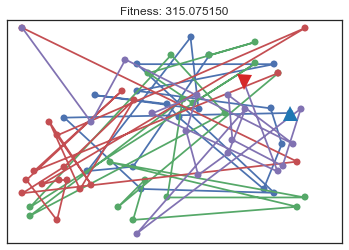

Generation 1000 best: 70.276966
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B5P5', 'B3P9', 'B3P2', 'B4P4', 'B2P11', 'B5P10', 'B5P8', 'B1P7', 'B7P1', 'B1P11', 'B5P3', 'B1P6', 'B2P3', 'B7P3', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B4P11', 'B1P5', 'B3P4', 'B3P11', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B4P7', 'B2P9', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B2P7', 'B4P9', 'B4P6', 'B1P12', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10')


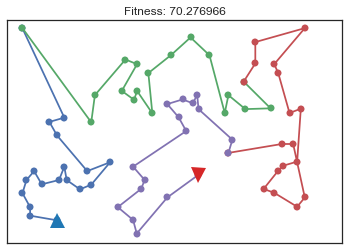

Generation 2000 best: 64.690664
('B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B3P4', 'B4P11', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B2P12', 'B3P3', 'B1P1', 'B5P9', 'B2P10', 'B6P2', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


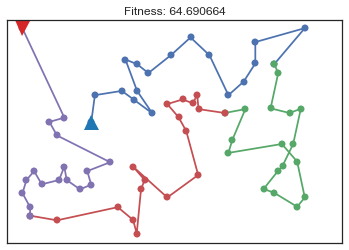

Generation 3000 best: 64.331123
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B3P4', 'B4P11', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B3P3', 'B2P12', 'B1P1', 'B2P10', 'B5P9', 'B6P2', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


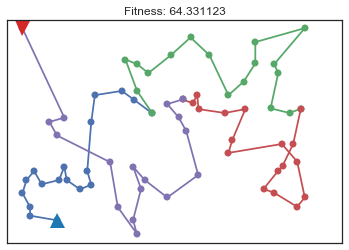

Generation 4000 best: 64.116056
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B3P4', 'B4P11', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B6P2', 'B2P10', 'B5P9', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


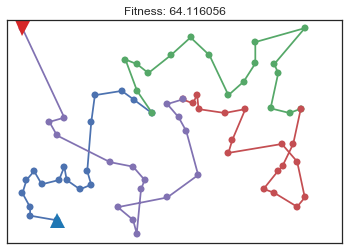

Generation 5000 best: 63.365301
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B4P11', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


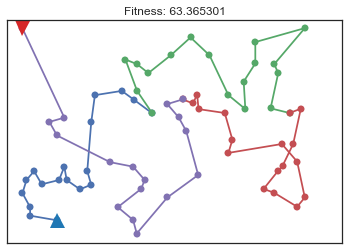

Generation 6000 best: 63.344328
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


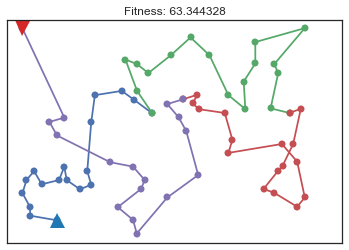

Generation 7000 best: 63.344328
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


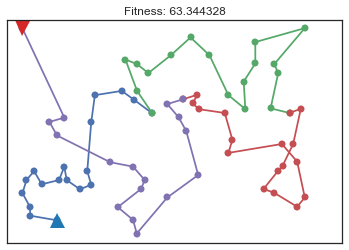

Generation 8000 best: 63.344328
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


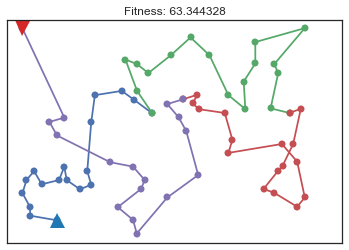

Generation 9000 best: 63.344328
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


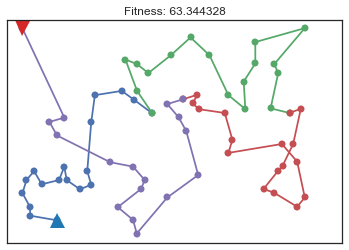

Generation 9999 best: 63.344328
('B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P10', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B7P3', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B3P11', 'B4P7', 'B2P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B4P9', 'B4P6', 'B1P12', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B3P3', 'B2P12', 'B5P5', 'B3P2', 'B4P4', 'B2P11', 'B5P10')


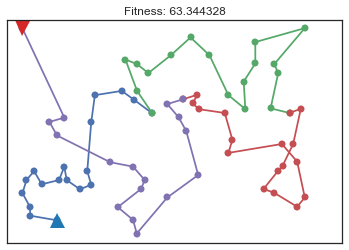

In [35]:
#from __future__ import print_function
#enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
import math

sb.set_style("white")
#plt.style.use("tableau10") 

location = r'/Users/betty/desktop/final-project-bettycc/wheres-waldo-locations.csv'
wheres_waldo_locations = pd.read_csv(location)

#where_waldo_locations
wheres_waldo_locations.describe()

waldo_location_map = {}

for i, record in wheres_waldo_locations.iterrows():
    key = "B%dP%d" % (record.Book, record.Page)
    waldo_location_map[key] = (record.X, record.Y)
    
# print(type(waldo_location_map))
# print(waldo_location_map.keys())
# print(type(waldo_location_map.keys()))
# print(list(waldo_location_map.keys()))

run_genetic_algorithm(generations=10000, population_size=100)